In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zaurasgarli","key":"e089f7a966c02bdf84b0641e381ee89e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/sujaykapadnis/emotion-recognition-dataset
License(s): CC-BY-NC-SA-4.0
yes


In [4]:
import os

In [5]:
import zipfile

In [6]:
with zipfile.ZipFile('/content/emotion-recognition-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [7]:
import shutil

shutil.rmtree('/content/dataset/Ahegao')

In [8]:
for dirpath, dirnames, filenames in os.walk('/content/dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 5 directories and 0 images in /content/dataset
There are 0 directories and 4027 images in /content/dataset/Neutral
There are 0 directories and 1313 images in /content/dataset/Angry
There are 0 directories and 3934 images in /content/dataset/Sad
There are 0 directories and 1234 images in /content/dataset/Surprise
There are 0 directories and 3740 images in /content/dataset/Happy


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib
import random

def view_random_image(target_dir, target_class):
  target_dir = pathlib.Path(target_dir) / target_class
  random_image = random.choice(os.listdir(target_dir))
  img = mpimg.imread(target_dir / random_image)

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  return img.shape

(222, 211, 3)

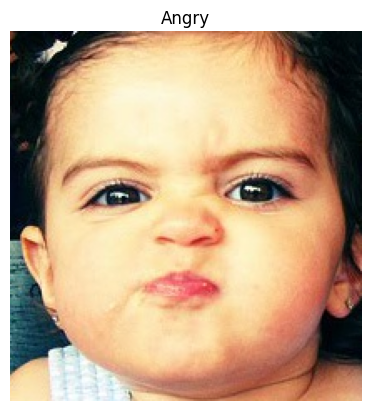

In [10]:
view_random_image(target_dir = '/content/dataset',target_class = 'Angry')

In [11]:
import tensorflow as tf
IMG_SIZE = (224, 224)

data_path = '/content/dataset'

train_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=IMG_SIZE, label_mode='categorical', subset='training', validation_split=0.2, seed=42, crop_to_aspect_ratio=True, batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(data_path, image_size=IMG_SIZE, label_mode='categorical', subset='validation', validation_split=0.2, seed=42, crop_to_aspect_ratio=True, batch_size=32)

Found 14248 files belonging to 5 classes.
Using 11399 files for training.
Found 14248 files belonging to 5 classes.
Using 2849 files for validation.


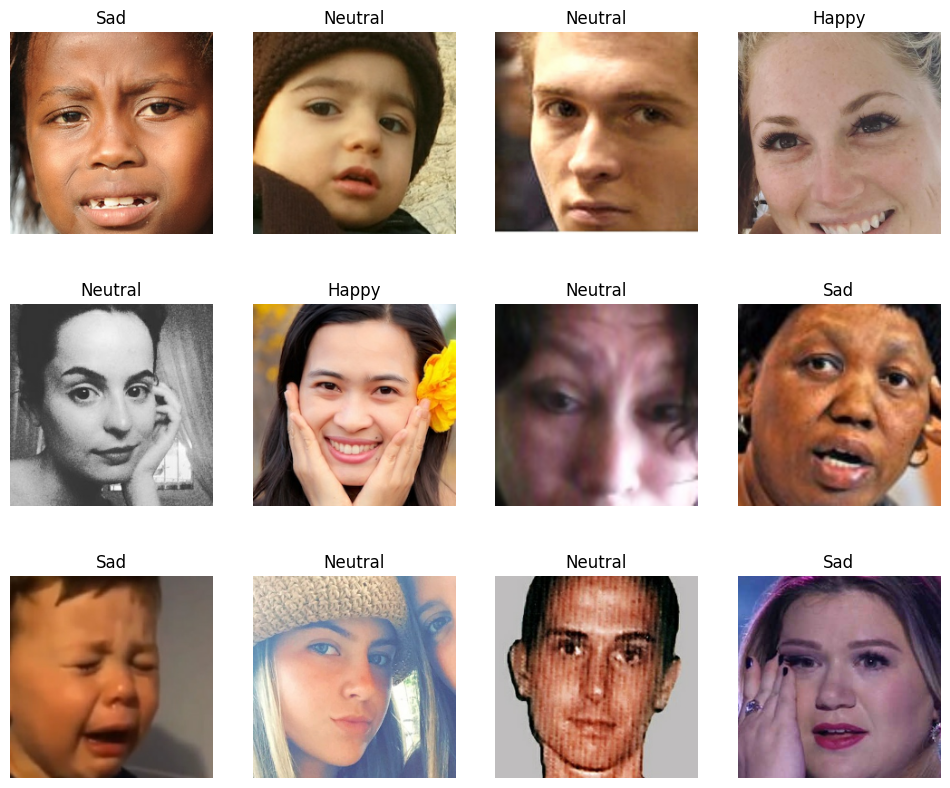

In [12]:
class_names = train_data.class_names

plt.figure(figsize=(12, 10))
for images, labels in train_data.take(1):
  for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i] / 255)
    plt.title(class_names[np.argmax(labels[i].numpy())])
    plt.axis('off')

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, strides=2, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 112, 112, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,547,397 (28.79 MB)

 Trainable params: 7,547,397 (28.79 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(train_data, validation_data = test_data, epochs = 5)

Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 70s 167ms/step - accuracy: 0.2621 - loss: 1.8403 - val_accuracy: 0.3005 - val_loss: 1.4883
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 56s 118ms/step - accuracy: 0.2814 - loss: 1.5065 - val_accuracy: 0.2717 - val_loss: 1.4972
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 43s 121ms/step - accuracy: 0.2896 - loss: 1.4920 - val_accuracy: 0.2903 - val_loss: 1.4880
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 84s 127ms/step - accuracy: 0.2826 - loss: 1.4966 - val_accuracy: 0.2903 - val_loss: 1.4945
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.2799 - loss: 1.4854 - val_accuracy: 0.3022 - val_loss: 1.4809


In [16]:
inputs=tf.keras.layers.Input(shape=(224, 224, 3))

x = tf.keras.applications.resnet50.preprocess_input(inputs)

base_model = tf.keras.applications.ResNet50(include_top=False, input_tensor=x)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(5, activation = 'softmax')(avg)

model = tf.keras.Model(inputs=base_model.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
base_model.trainable=False

In [18]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 357,
    decay_rate = 0.96
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=3, restore_best_weights=True)

check_point = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only = True)

model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [19]:
model.fit(train_data, epochs=15, validation_data=test_data, callbacks=[early_stopping, check_point])

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


357/357 ━━━━━━━━━━━━━━━━━━━━ 75s 178ms/step - accuracy: 0.4608 - loss: 1.3019 - val_accuracy: 0.6083 - val_loss: 0.9717
Epoch 2/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 48s 133ms/step - accuracy: 0.6302 - loss: 0.9277 - val_accuracy: 0.6455 - val_loss: 0.9025
Epoch 3/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.6674 - loss: 0.8386 - val_accuracy: 0.6494 - val_loss: 0.8851
Epoch 4/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 45s 125ms/step - accuracy: 0.6883 - loss: 0.7974 - val_accuracy: 0.6441 - val_loss: 0.9042
Epoch 5/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 83s 127ms/step - accuracy: 0.7052 - loss: 0.7526 - val_accuracy: 0.6413 - val_loss: 0.8856
Epoch 6/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 46s 127ms/step - accuracy: 0.7070 - loss: 0.7391 - val_accuracy: 0.6774 - val_loss: 0.8199
Epoch 7/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.7202 - loss: 0.7096 - val_accuracy: 0.6483 - val_loss: 0.8808
Epoch 8/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 45s 127ms/step - accuracy: 0.7295 - loss: 0.6836 - val

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_16']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


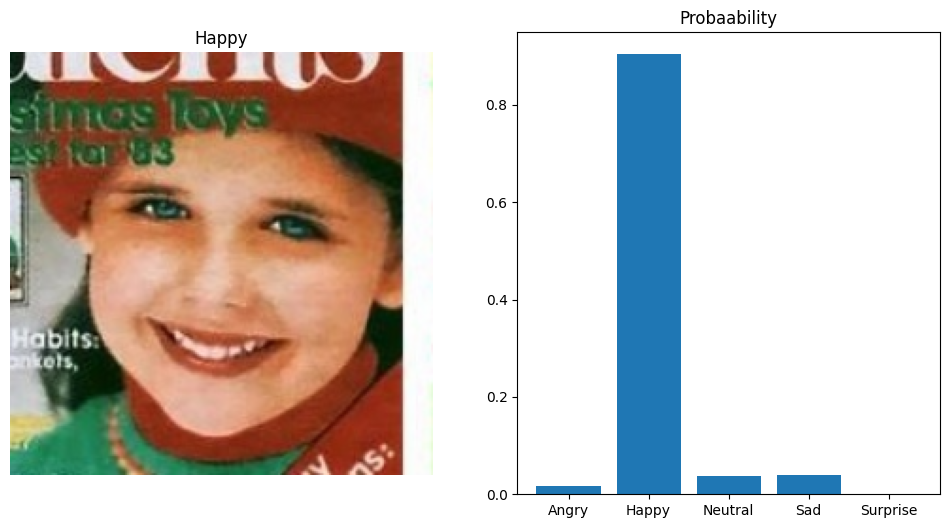

In [20]:
def pred_and_plot(model, X, y):
  img = mpimg.imread(X)
  img = tf.image.resize(img, size=[224, 224])
  y_pred = model.predict(np.expand_dims(img, axis = 0))

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(img / 255)
  plt.title(class_names[np.argmax(y_pred)])
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.bar(class_names, y_pred[0])
  plt.title('Probaability')
  plt.show()

pred_and_plot(model, '/content/dataset/Happy/000a72729218f928b4a9017cd09f71e30126ce497fe54446b94a90ea.JPG', 'Happy')

In [21]:
model.save("FacialEmotionRecognition.keras")